In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases_state = pd.read_csv('cases_state.csv')
cases_state

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0
...,...,...,...,...,...
9451,2021-09-06,Selangor,2126,0,NaN
9452,2021-09-06,Terengganu,700,0,NaN
9453,2021-09-06,W.P. Kuala Lumpur,398,6,NaN
9454,2021-09-06,W.P. Labuan,5,0,NaN


In [3]:
cases_state.dtypes

date                object
state               object
cases_new            int64
cases_import         int64
cases_recovered    float64
dtype: object

In [4]:
cases_state.isnull()

,date,state,cases_new,cases_import,cases_recovered
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9451,False,False,False,False,True
9452,False,False,False,False,True
9453,False,False,False,False,True
9454,False,False,False,False,True


In [5]:
cases_state.drop_duplicates()

,date,state,cases_new,cases_import,cases_recovered
0,2020-01-25,Johor,4,4,0.0
1,2020-01-25,Kedah,0,0,0.0
2,2020-01-25,Kelantan,0,0,0.0
3,2020-01-25,Melaka,0,0,0.0
4,2020-01-25,Negeri Sembilan,0,0,0.0
...,...,...,...,...,...
9451,2021-09-06,Selangor,2126,0,NaN
9452,2021-09-06,Terengganu,700,0,NaN
9453,2021-09-06,W.P. Kuala Lumpur,398,6,NaN
9454,2021-09-06,W.P. Labuan,5,0,NaN


In [6]:
cases_state.describe()

,cases_new,cases_import,cases_recovered
count,9456.000000,9456.000000,9296.000000
mean,196.931789,0.485406,148.344019
std,604.860962,2.190890,495.449185
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,7.000000,0.000000,4.000000
75%,124.250000,0.000000,90.000000
max,8792.000000,72.000000,8803.000000


In [7]:
#we decide to fill all the null value with zero,since only cases recovered have null value
#and the value is null because the still havent updated the recovered cases or 
#maybe there are no patient recovered
cases_state.fillna((0), inplace=True)
cases_state.describe()

,cases_new,cases_import,cases_recovered
count,9456.000000,9456.000000,9456.000000
mean,196.931789,0.485406,145.833968
std,604.860962,2.190890,491.611715
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,7.000000,0.000000,3.000000
75%,124.250000,0.000000,85.000000
max,8792.000000,72.000000,8803.000000


In [8]:
states = cases_state['state'].unique()
states

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Pulau Pinang', 'Perak', 'Perlis', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [9]:
cases_malaysia = pd.read_csv('cases_malaysia.csv')
cases_malaysia.fillna((0), inplace=True)
cases_malaysia

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-29,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
586,2021-09-02,20988,1,23473,0.0,5.0,351.0,112.0,52.0,81.0,1110.0
587,2021-09-03,19378,14,22399,0.0,5.0,562.0,64.0,12.0,102.0,1191.0
588,2021-09-04,19057,10,21582,0.0,4.0,250.0,8.0,100.0,54.0,886.0
589,2021-09-05,20396,8,20573,0.0,6.0,447.0,98.0,23.0,41.0,1385.0


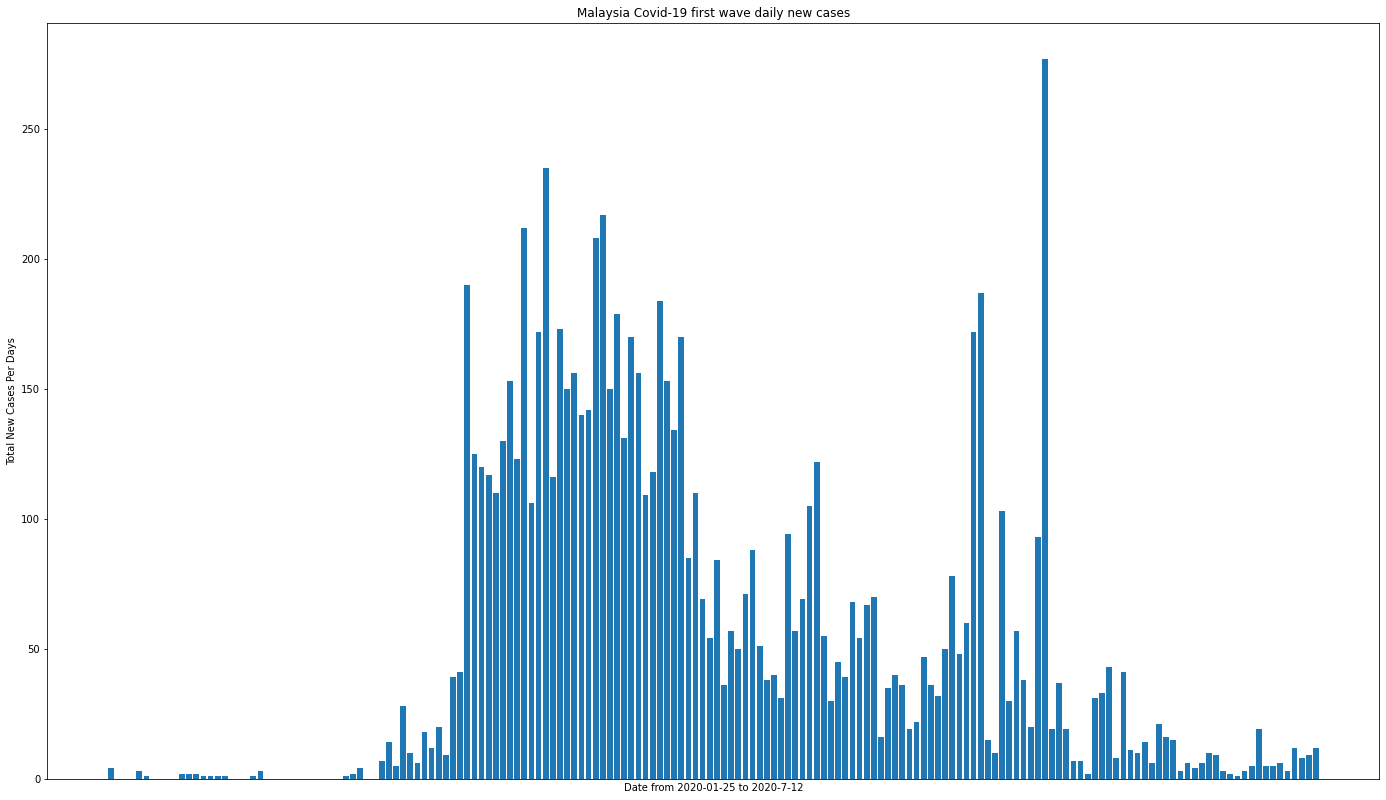

In [10]:
#from 2020-01-25 to 2020-7-12 wave 1
wave1 = cases_malaysia.iloc[:170]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave1['date'], wave1['cases_new'],data = wave1)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2020-01-25 to 2020-7-12')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 first wave daily new cases')
plt.show()

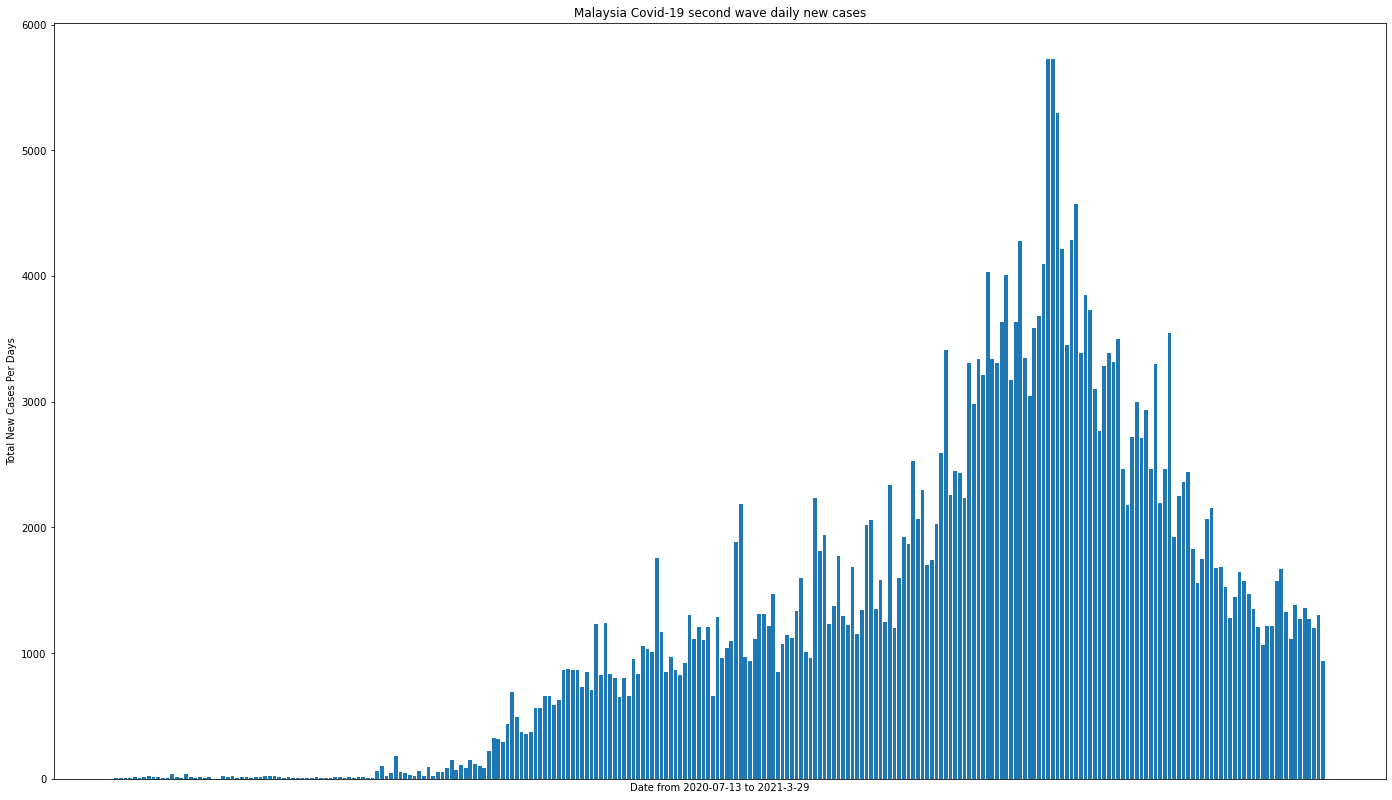

In [11]:
#from 2020-07-13 to 2021-3-29 wave 2
wave2 = cases_malaysia.iloc[170:430]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave2['date'], wave2['cases_new'],data = wave2)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2020-07-13 to 2021-3-29')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 second wave daily new cases')
plt.show()

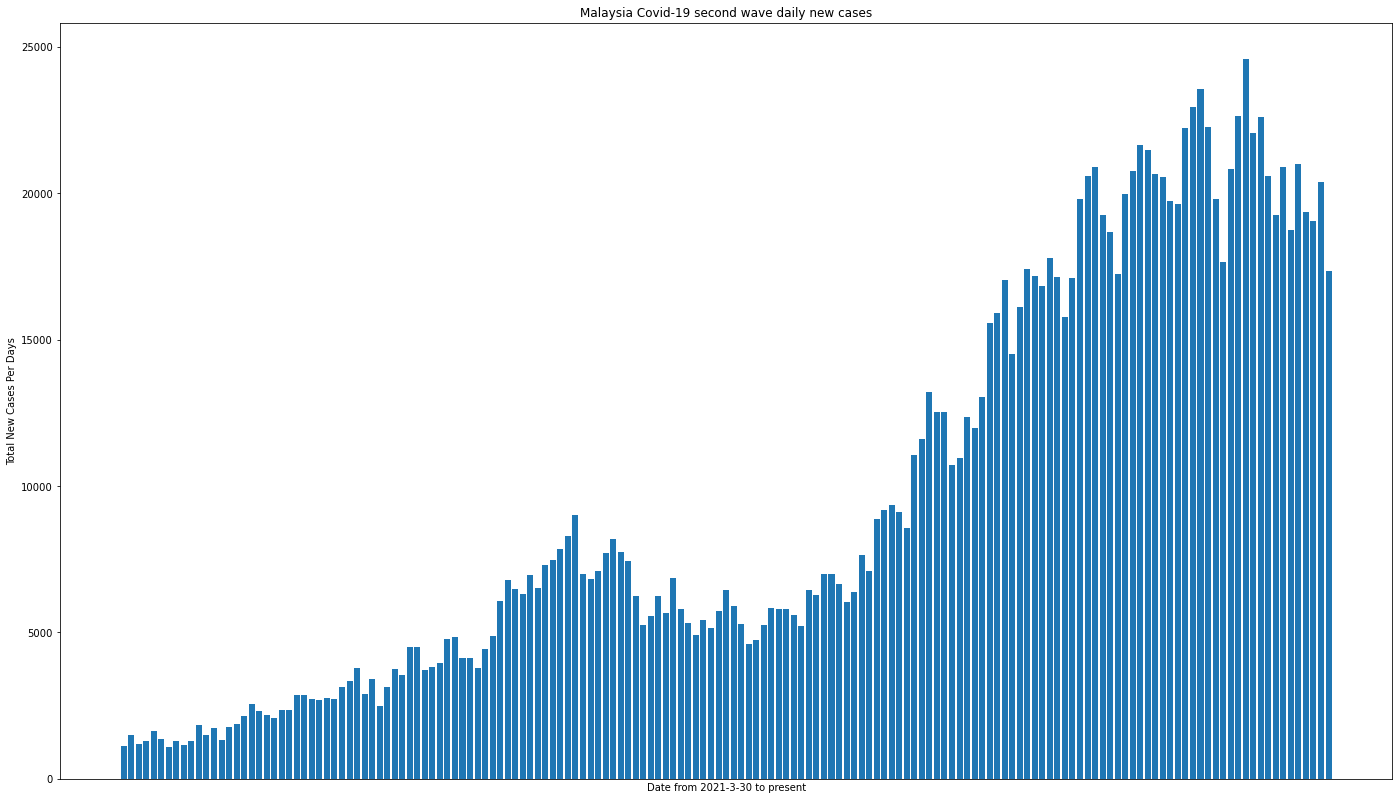

In [12]:
#from 2021-3-30 to present wave 3
wave3 = cases_malaysia.iloc[430:]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(wave3['date'], wave3['cases_new'],data = wave3)
ax.set_ylabel('Total New Cases Per Days')
ax.set_xlabel('Date from 2021-3-30 to present')
ax.axes.xaxis.set_ticks([])
ax.set_title('Malaysia Covid-19 second wave daily new cases')
plt.show()

In [13]:
#calculate each states total cases
num_of_state = 16
wave1_each_states = cases_state.iloc[:170*num_of_state]
wave2_each_states = cases_state.iloc[170*num_of_state:430*num_of_state]
wave3_each_states = cases_state.iloc[430*num_of_state:]


print('Wave 1 : each states total cases')
each_state_total_cases_wave_1 = wave1_each_states.groupby(["state"]).agg({"cases_new": "sum"})
each_state_total_cases_wave_1 = each_state_total_cases_wave_1.reset_index()
each_state_total_cases_wave_1 = each_state_total_cases_wave_1.rename(columns={"cases_new" : "total_cases"})
each_state_total_cases_wave_1["total_cases"] = each_state_total_cases_wave_1["total_cases"].astype('float')
display(each_state_total_cases_wave_1)

print('Wave 2 : each states total cases')
each_state_total_cases_wave_2 = wave2_each_states.groupby(["state"]).agg({"cases_new": "sum"})
each_state_total_cases_wave_2 = each_state_total_cases_wave_2.reset_index()
each_state_total_cases_wave_2 = each_state_total_cases_wave_2.rename(columns={"cases_new" : "total_cases"})
each_state_total_cases_wave_2["total_cases"] = each_state_total_cases_wave_2["total_cases"].astype('float')
display(each_state_total_cases_wave_2)

print('Wave 2 : each states total cases')
each_state_total_cases_wave_3 = wave3_each_states.groupby(["state"]).agg({"cases_new": "sum"})
each_state_total_cases_wave_3 = each_state_total_cases_wave_3.reset_index()
each_state_total_cases_wave_3 = each_state_total_cases_wave_3.rename(columns={"cases_new" : "total_cases"})
each_state_total_cases_wave_3["total_cases"] = each_state_total_cases_wave_3["total_cases"].astype('float')
display(each_state_total_cases_wave_3)

Wave 1 : each states total cases


,state,total_cases
0,Johor,699.0
1,Kedah,98.0
2,Kelantan,157.0
3,Melaka,257.0
4,Negeri Sembilan,1027.0
5,Pahang,365.0
6,Perak,258.0
7,Perlis,18.0
8,Pulau Pinang,121.0
9,Sabah,380.0


Wave 2 : each states total cases


,state,total_cases
0,Johor,40374.0
1,Kedah,8259.0
2,Kelantan,5992.0
3,Melaka,6238.0
4,Negeri Sembilan,16170.0
5,Pahang,3849.0
6,Perak,12633.0
7,Perlis,310.0
8,Pulau Pinang,15554.0
9,Sabah,54277.0


Wave 2 : each states total cases


,state,total_cases
0,Johor,110386.0
1,Kedah,100710.0
2,Kelantan,79209.0
3,Melaka,44270.0
4,Negeri Sembilan,75845.0
5,Pahang,43151.0
6,Perak,62069.0
7,Perlis,2044.0
8,Pulau Pinang,80981.0
9,Sabah,106608.0


In [14]:
population = pd.read_csv('population.csv')
population.drop(['pop_18','pop_60','idxs'],axis='columns', inplace=True)
population.drop(0,axis='rows', inplace=True)
state_index = np.arange(16)
population.index = state_index
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Pulau Pinang,1773600
7,Perak,2510300
8,Perlis,254900
9,Selangor,6538000


In [15]:
#rearrange the dataset so the states arrangement will be same as the each states daily cases's datasets

temp = population.iloc[6]
population.iloc[6] = population.iloc[7]
population.iloc[7] = temp
temp = population.iloc[7]
population.iloc[7] = population.iloc[8]
population.iloc[8] = temp
temp = population.iloc[9]
population.iloc[9] = population.iloc[11]
population.iloc[11] = temp
temp = population.iloc[10]
population.iloc[10] = population.iloc[12]
population.iloc[12] = temp
population

,state,pop
0,Johor,3781000
1,Kedah,2185100
2,Kelantan,1906700
3,Melaka,932700
4,Negeri Sembilan,1128800
5,Pahang,1678700
6,Perak,2510300
7,Perlis,254900
8,Pulau Pinang,1773600
9,Sabah,3908500


In [30]:
#base on the wave u wan to test can change here

each_state_total_cases = each_state_total_cases_wave_3
each_state_total_cases["total_cases"] = each_state_total_cases["total_cases"] / population["pop"]

In [31]:
each_state_total_cases_devide_by_population = each_state_total_cases.rename(columns ={"total_cases" : "total_cases / Population"})
each_state_total_cases_devide_by_population

,state,total_cases / Population
0,Johor,0.029195
1,Kedah,0.046089
2,Kelantan,0.041542
3,Melaka,0.047464
4,Negeri Sembilan,0.067191
5,Pahang,0.025705
6,Perak,0.024726
7,Perlis,0.008019
8,Pulau Pinang,0.045659
9,Sabah,0.027276


In [32]:
column_maxes = each_state_total_cases_devide_by_population['total_cases / Population'].max()
each_state_total_cases_devide_by_population['total_cases / Population'] = each_state_total_cases_devide_by_population['total_cases / Population'] / column_maxes
each_state_total_cases_devide_by_population

,state,total_cases / Population
0,Johor,0.371834
1,Kedah,0.587006
2,Kelantan,0.529095
3,Melaka,0.604517
4,Negeri Sembilan,0.855759
5,Pahang,0.327385
6,Perak,0.314913
7,Perlis,0.102130
8,Pulau Pinang,0.581525
9,Sabah,0.347393


In [33]:
outlierDetection = each_state_total_cases_devide_by_population

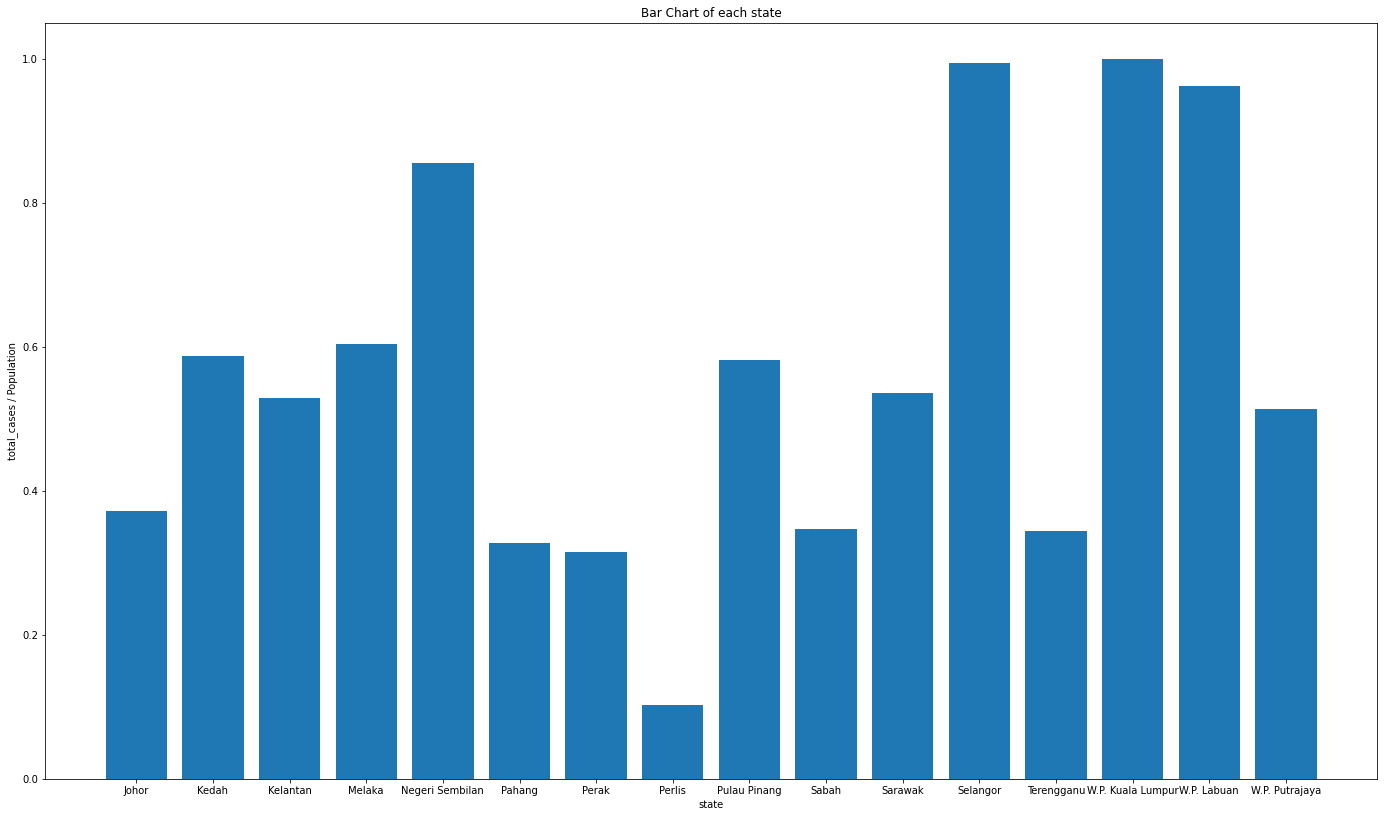

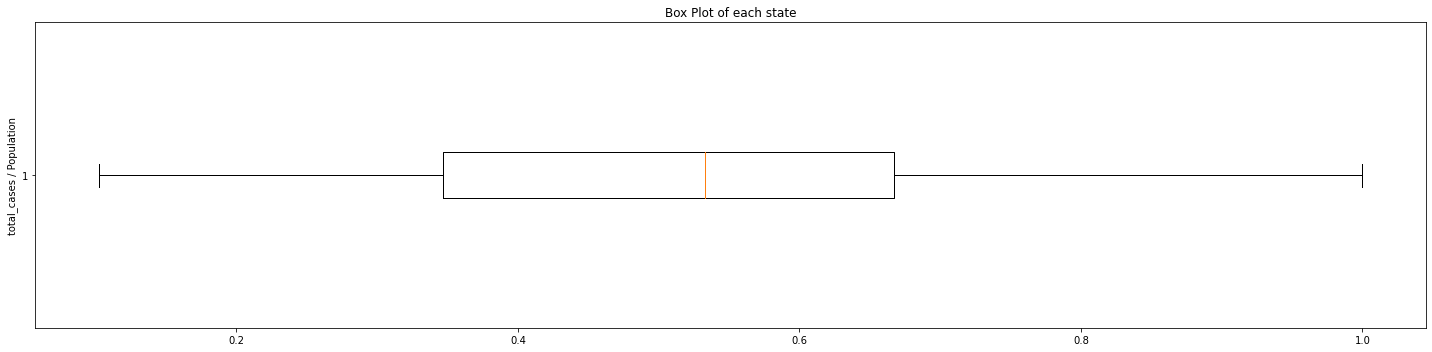

In [34]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(outlierDetection['state'], outlierDetection['total_cases / Population'],data = outlierDetection)
ax.set_ylabel('total_cases / Population')
ax.set_xlabel('state')
ax.set_title('Bar Chart of each state')
plt.show()

fig = plt.figure(figsize=(20,5))
plt.boxplot(outlierDetection['total_cases / Population'],vert = False)
plt.title("Box Plot of each state")
plt.ylabel("total_cases / Population")
plt.tight_layout()
plt.show()

In [35]:
Q1 = outlierDetection.quantile(0.25)
Q3 = outlierDetection.quantile(0.75)
IQR = Q3 - Q1
IQR['total_cases / Population']

0.3205785086332595

In [36]:
#Categerize each state risk the base on their iqr range

VeryHighRisk = outlierDetection[outlierDetection['total_cases / Population'] > (Q3['total_cases / Population'] + IQR['total_cases / Population'])]
print('Very High Risk States')
display(VeryHighRisk)

HighRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q3['total_cases / Population']]
HighRisk = HighRisk[HighRisk['total_cases / Population'] < (Q3['total_cases / Population'] + IQR['total_cases / Population'])]
print('High Risk States')
display(HighRisk)

MediumRisk = outlierDetection[outlierDetection['total_cases / Population'] >= Q1['total_cases / Population']]
MediumRisk = MediumRisk[MediumRisk['total_cases / Population'] < Q3['total_cases / Population']]
print('Medium Risk States')
display(MediumRisk)

LowRisk = outlierDetection[outlierDetection['total_cases / Population'] < Q1['total_cases / Population']]
print('Low Risk States')
display(LowRisk)

Very High Risk States


,state,total_cases / Population
11,Selangor,0.993815
13,W.P. Kuala Lumpur,1.000000


High Risk States


,state,total_cases / Population
4,Negeri Sembilan,0.855759
14,W.P. Labuan,0.961612


Medium Risk States


,state,total_cases / Population
0,Johor,0.371834
1,Kedah,0.587006
2,Kelantan,0.529095
3,Melaka,0.604517
8,Pulau Pinang,0.581525
9,Sabah,0.347393
10,Sarawak,0.536089
15,W.P. Putrajaya,0.513734


Low Risk States


,state,total_cases / Population
5,Pahang,0.327385
6,Perak,0.314913
7,Perlis,0.102130
12,Terengganu,0.344818


In [37]:
tests_state = pd.read_csv('tests_malaysia.csv')
tests_state

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
585,2021-08-31,55573,67125
586,2021-09-01,96183,69043
587,2021-09-02,90232,70035
588,2021-09-03,77745,69765


In [38]:
tests_state.dtypes

date      object
rtk-ag     int64
pcr        int64
dtype: object

In [25]:
#mean this dataset no null value
tests_state.isna().sum()

date      0
rtk-ag    0
pcr       0
dtype: int64

In [26]:
tests_state.drop_duplicates()

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
585,2021-08-31,55573,67125
586,2021-09-01,96183,69043
587,2021-09-02,90232,70035
588,2021-09-03,77745,69765


In [27]:
#All null value will be filled up with zero since ,null mean no people is te
tests_state.fillna((0), inplace=True)
tests_state.describe()

,rtk-ag,pcr
count,590.000000,590.000000
mean,19547.216949,26174.510169
std,24017.358347,23476.395861
min,0.000000,2.000000
25%,1046.250000,5919.000000
50%,6337.000000,18607.000000
75%,32767.000000,42023.750000
max,96219.000000,90293.000000


In [28]:
#we decide to add a new column into the dataset ,which is total testing for the date
total_testing = tests_state['rtk-ag'] + tests_state['pcr']
tests_state['total_testing'] = total_testing
tests_state 

,date,rtk-ag,pcr,total_testing
0,2020-01-24,0,2,2
1,2020-01-25,0,5,5
2,2020-01-26,0,14,14
3,2020-01-27,0,24,24
4,2020-01-28,0,53,53
...,...,...,...,...
585,2021-08-31,55573,67125,122698
586,2021-09-01,96183,69043,165226
587,2021-09-02,90232,70035,160267
588,2021-09-03,77745,69765,147510


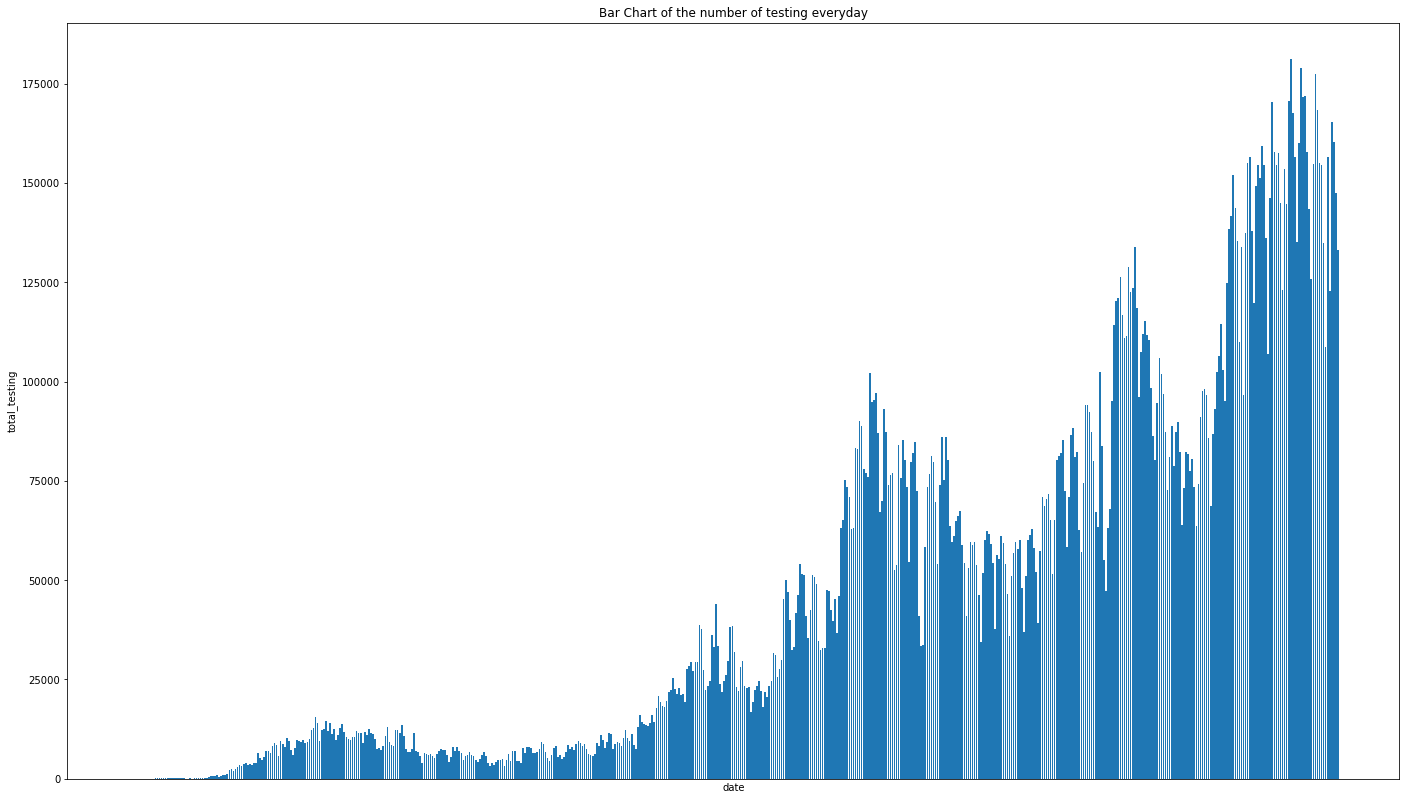

In [29]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_axes([0,0,1,1])
ax.bar(tests_state['date'], tests_state['total_testing'],data = tests_state)
ax.set_ylabel('total_testing')
ax.set_xlabel('date')
ax.set_xticks([])
ax.set_title('Bar Chart of the number of testing everyday')
plt.show()
